In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Import Data

In [18]:
import pandas as pd
trainingset = pd.read_csv(r"C:\Users\cristian\Downloads\trainingset.csv")
devset = pd.read_csv(r"C:\Users\cristian\Downloads\devset.csv")
trainingset.head()

,Gender,Height,Weight
0,Female,154,132
1,Male,191,62
2,Female,167,135
3,Male,171,141
4,Female,179,103


In [19]:
# Changes tag Male and Female to 1 & 0 
trainingset['Gender'].replace('Male',1, inplace=True)
trainingset['Gender'].replace('Female',0, inplace=True)
devset['Gender'].replace('Male',1, inplace=True)
devset['Gender'].replace('Female',0, inplace=True)

#Charges data
X = np.array([trainingset["Height"],trainingset["Weight"]])
X_test=np.array([devset["Height"],devset["Weight"]])
Y = np.array([trainingset["Gender"]])
Y_test = np.array([devset["Gender"]])
X = X.T
y = Y.T
print("training shape")
print(X.shape)
print(Y.shape)
print("dev shape")
print(X_test.shape)
print(Y_test.shape)
# print("X=" + str(X))
# print("Y=" + str(Y))

training shape
(392, 2)
(1, 392)
dev shape
(2, 98)
(1, 98)


# Normalization 

In [20]:
m = X.shape[0]
mu = np.sum((X))/m
sigma = np.sum((X)**2)/m
X = (X-mu)/sigma
X[0]

array([-0.00293801, -0.00346901])

# Model

In [28]:
import tensorflow as tf
from tensorflow import keras
# load the dataset
# dataset = None
# split into input (X) and output (y) variables
# define the keras model
model = keras.Sequential()
model.add(layers.Dense(3, input_dim= 2, activation='tanh', name="layer1"))
model.add(layers.Dense(1, activation='sigmoid', name="layer2"))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=392)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
392/392 [==============================] - 0s 1ms/sample - loss: 0.6932 - acc: 0.5000
Epoch 2/150
392/392 [==============================] - 0s 5us/sample - loss: 0.6932 - acc: 0.5000
Epoch 3/150
392/392 [==============================] - 0s 20us/sample - loss: 0.6932 - acc: 0.5000
Epoch 4/150
392/392 [==============================] - 0s 10us/sample - loss: 0.6932 - acc: 0.5000
Epoch 5/150
392/392 [==============================] - 0s 8us/sample - loss: 0.6932 - acc: 0.5000
Epoch 6/150
392/392 [==============================] - 0s 18us/sample - loss: 0.6932 - acc: 0.5000
Epoch 7/150
392/392 [==============================] - 0s 10us/sample - loss: 0.6932 - acc: 0.5000
Epoch 8/150
392/392 [==============================] - 0s 13us/sample - loss: 0.6932 - acc: 0.5000
Epoch 9/150
392/392 [==============================] - 0s 6us/sample - loss: 0.6932 - acc: 0.5000
Epoch 10/150
392/392 [==============================] - 0s 23us/sample - loss: 0.6932 - acc: 0.5000
Epoch 11/150


# Conclusion
Result is 50% accuracy, this make sense because data is similar as men as women.

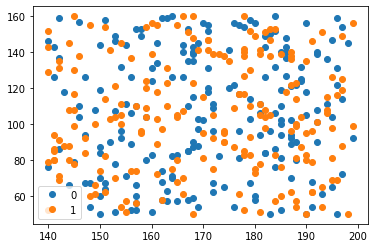

In [24]:
import matplotlib.pyplot as plt
                                #aqui tu x                      #aqui tu y                    #aqui el label
data = pd.DataFrame({"X Value": trainingset["Height"], "Y Value": trainingset["Weight"], "Category": trainingset["Gender"]})
groups = data.groupby("Category")

for name, group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
plt.legend()

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer2 (Dense)               (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
